In [65]:
import textacy
import textacy.representations.vectorizers as vectorizers
import numpy as np
import umap
import umap.plot
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances, manhattan_distances

vectorizer = vectorizers.Vectorizer(tf_type='linear', idf_type='smooth')


In [57]:
limit = 200

tv_class = np.zeros([200])
food_class = np.ones([141])
health_class = np.ones([200]) * 2
poli_class = np.ones([200]) * 3

total_class = np.concatenate([tv_class, food_class, health_class, poli_class]).astype(int)

In [70]:
corpus_4cls = textacy.Corpus.load("en_core_web_trf", "../../models/P76I900/HW4/wikinews_4cls_corpus.bin.gz")

corpus_tv = corpus_4cls[0:200]
corpus_food = corpus_4cls[200:200+141]
corpus_health = corpus_4cls[200+141:200+141+200]
corpus_poli = corpus_4cls[200+141+200:-1]


In [60]:
len(corpus_4cls)

741

In [61]:
print(corpus_4cls)

Corpus(741 docs, 504783 tokens)


In [71]:
tv_class = np.zeros([200]).astype(int)
food_class = np.ones([141]).astype(int)
health_class = np.ones([200]).astype(int) * 2
poli_class = np.ones([200]).astype(int) * 3

In [62]:
tokenized_4cls = ((term.lemma_ for term in textacy.extract.terms(doc, ngs=1, ents=True, ncs=True, dedupe=True)) for doc in corpus_4cls)
dot_4cls = vectorizer.fit_transform(tokenized_4cls)

In [69]:

a = dot_4cls[0].toarray()
b = dot_4cls[2].toarray()

dist = euclidean_distances(a,b)[0][0]
print(dist)

137.93060221719196


<AxesSubplot:>

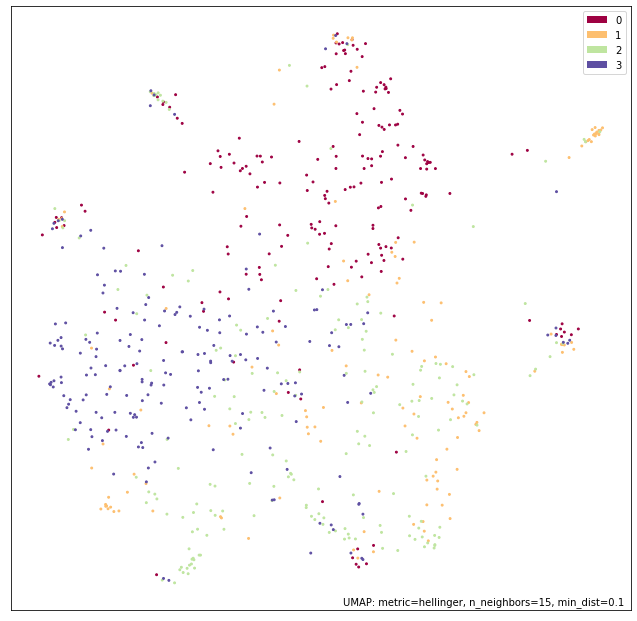

In [32]:
#Try Umap
mapper = umap.UMAP(metric='hellinger', random_state=42).fit(dot_4cls)
umap.plot.points(mapper, labels=total_class)